<a href="https://www.kaggle.com/code/tanbeerjubaer/ipe-work?scriptVersionId=154106162" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

In [2]:
# inp = input('Enter something?')
# print(inp+inp)

In [3]:
data = pd.read_csv('/kaggle/input/life-perception/Dataset-for-case-study.csv')
data.head(3)

,Product Name,Restocking schedule,Date,Restock quantity,Restock unit,Quantity sold,Sold unit,Shop Name
0,Milk,Per day,10/1/23,30,Packets,26,Packets,shwapno
1,Milk,Per day,10/2/23,35,Packets,25,Packets,shwapno
2,Milk,Per day,10/3/23,30,Packets,30,Packets,shwapno


In [4]:
data.columns

Index(['Product Name', 'Restocking schedule', 'Date', 'Restock quantity ',
       'Restock unit', 'Quantity sold  ', 'Sold unit', 'Shop Name'],
      dtype='object')

In [5]:
cl = 'ds dss  ' 
# cleaned_text = re.sub('(?<=[\s][^\u0980-\u09FFa-zA-Z0-9])[^\u0980-\u09FFA-Za-z0-9]+',"", cl)
cleaned_text = re.sub('(?<=[a-z])[\s](?=[a-z])', '_', cl)
cleaned_text = ' '.join(cleaned_text.split())
# cleaned_text = re.sub('[\s]+', '', cleaned_text)
cleaned_text

'ds_dss'

In [6]:
data.columns = data.columns.str.lower()
col_map = {col: re.sub('(?<=[a-z])[\s](?=[a-z])', '_', col) for col in data.columns}
data.rename(columns=col_map, inplace=True)
col_map = {col: re.sub('[\s]+', '', col) for col in data.columns}
data.rename(columns=col_map, inplace=True)
col_map

{'product_name': 'product_name',
 'restocking_schedule': 'restocking_schedule',
 'date': 'date',
 'restock_quantity ': 'restock_quantity',
 'restock_unit': 'restock_unit',
 'quantity_sold  ': 'quantity_sold',
 'sold_unit': 'sold_unit',
 'shop_name': 'shop_name'}

In [7]:
data.columns

Index(['product_name', 'restocking_schedule', 'date', 'restock_quantity',
       'restock_unit', 'quantity_sold', 'sold_unit', 'shop_name'],
      dtype='object')

In [8]:
data.head(2)

,product_name,restocking_schedule,date,restock_quantity,restock_unit,quantity_sold,sold_unit,shop_name
0,Milk,Per day,10/1/23,30,Packets,26,Packets,shwapno
1,Milk,Per day,10/2/23,35,Packets,25,Packets,shwapno


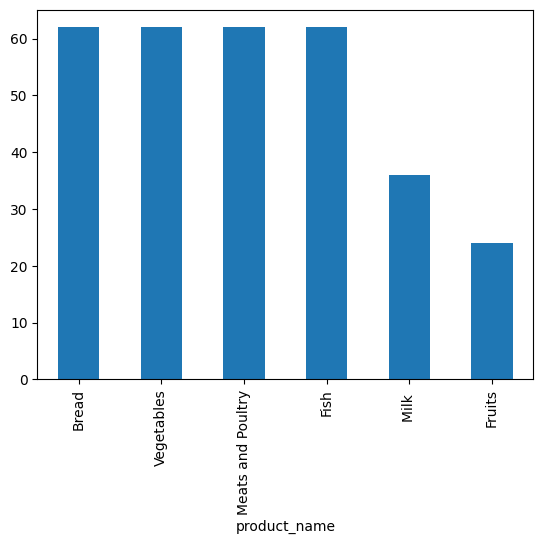

In [9]:
data.product_name.value_counts().plot(kind='bar');

In [10]:
data.shape

(308, 8)

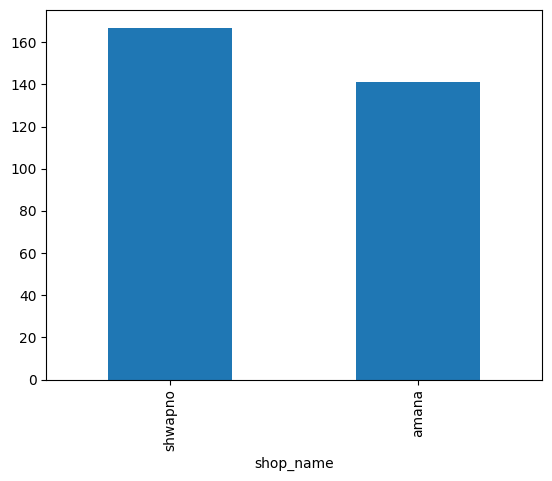

In [11]:
data.shop_name.value_counts().plot(kind='bar');

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


# data['product_name2'] = label_encoder.fit_transform(data['product_name'])
# data['restocking_schedule2'] = label_encoder.fit_transform(data['restocking_schedule'])

In [13]:
data.sample()

,product_name,restocking_schedule,date,restock_quantity,restock_unit,quantity_sold,sold_unit,shop_name
34,Bread,Per day,10/4/23,12,Packets,8,Packets,shwapno


In [14]:
data.dtypes

product_name           object
restocking_schedule    object
date                   object
restock_quantity        int64
restock_unit           object
quantity_sold           int64
sold_unit              object
shop_name              object
dtype: object

In [15]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.dtypes

/tmp/ipykernel_19/476156012.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


product_name                   object
restocking_schedule            object
date                   datetime64[ns]
restock_quantity                int64
restock_unit                   object
quantity_sold                   int64
sold_unit                      object
shop_name                      object
dtype: object

In [16]:
data.head(3)

,product_name,restocking_schedule,date,restock_quantity,restock_unit,quantity_sold,sold_unit,shop_name
0,Milk,Per day,2023-10-01,30,Packets,26,Packets,shwapno
1,Milk,Per day,2023-10-02,35,Packets,25,Packets,shwapno
2,Milk,Per day,2023-10-03,30,Packets,30,Packets,shwapno


In [17]:
# Dictionary to store mappings for each column
mappings = {}

# Loop through each categorical column
for column in data.select_dtypes(include=['object']).columns:
    # Apply Label Encoding
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])
    
    # Store the mapping for the column
    mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mappings
print("Mappings of Categories to Numerical Values:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")

Mappings of Categories to Numerical Values:
product_name: {'Bread': 0, 'Fish': 1, 'Fruits': 2, 'Meats and Poultry': 3, 'Milk ': 4, 'Vegetables': 5}
restocking_schedule: {'2 days per week': 0, 'Per day': 1, 'Per week': 2}
restock_unit: {'Kg': 0, 'Packets': 1}
sold_unit: {'Kg': 0, 'Packets': 1}
shop_name: {'amana': 0, 'shwapno': 1}


In [18]:
data.head()

,product_name,restocking_schedule,date,restock_quantity,restock_unit,quantity_sold,sold_unit,shop_name,product_name_encoded,restocking_schedule_encoded,restock_unit_encoded,sold_unit_encoded,shop_name_encoded
0,Milk,Per day,2023-10-01,30,Packets,26,Packets,shwapno,4,1,1,1,1
1,Milk,Per day,2023-10-02,35,Packets,25,Packets,shwapno,4,1,1,1,1
2,Milk,Per day,2023-10-03,30,Packets,30,Packets,shwapno,4,1,1,1,1
3,Milk,Per day,2023-10-04,40,Packets,39,Packets,shwapno,4,1,1,1,1
4,Milk,Per day,2023-10-05,42,Packets,35,Packets,shwapno,4,1,1,1,1


In [19]:
print(data.product_name.value_counts())
print(data.product_name_encoded.value_counts())

product_name
Bread                62
Vegetables           62
Meats and Poultry    62
Fish                 62
Milk                 36
Fruits               24
Name: count, dtype: int64
product_name_encoded
0    62
5    62
3    62
1    62
4    36
2    24
Name: count, dtype: int64


In [20]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Day_of_week'] = data['date'].dt.dayofweek


data.drop(columns=['date'], inplace=True)

In [21]:
data.head(3)

,product_name,restocking_schedule,restock_quantity,restock_unit,quantity_sold,sold_unit,shop_name,product_name_encoded,restocking_schedule_encoded,restock_unit_encoded,sold_unit_encoded,shop_name_encoded,Year,Month,Day,Day_of_week
0,Milk,Per day,30,Packets,26,Packets,shwapno,4,1,1,1,1,2023,10,1,6
1,Milk,Per day,35,Packets,25,Packets,shwapno,4,1,1,1,1,2023,10,2,0
2,Milk,Per day,30,Packets,30,Packets,shwapno,4,1,1,1,1,2023,10,3,1


In [22]:
data.columns

Index(['product_name', 'restocking_schedule', 'restock_quantity',
       'restock_unit', 'quantity_sold', 'sold_unit', 'shop_name',
       'product_name_encoded', 'restocking_schedule_encoded',
       'restock_unit_encoded', 'sold_unit_encoded', 'shop_name_encoded',
       'Year', 'Month', 'Day', 'Day_of_week'],
      dtype='object')

In [23]:
selected_cols = ['product_name_encoded', 'restocking_schedule_encoded', 'restock_quantity',
       'restock_unit_encoded', 'quantity_sold', 'shop_name_encoded',
       'Year', 'Month', 'Day', 'Day_of_week']
selected_cols

['product_name_encoded',
 'restocking_schedule_encoded',
 'restock_quantity',
 'restock_unit_encoded',
 'quantity_sold',
 'shop_name_encoded',
 'Year',
 'Month',
 'Day',
 'Day_of_week']

In [24]:
train = data[selected_cols].copy()
train.head(3)

,product_name_encoded,restocking_schedule_encoded,restock_quantity,restock_unit_encoded,quantity_sold,shop_name_encoded,Year,Month,Day,Day_of_week
0,4,1,30,1,26,1,2023,10,1,6
1,4,1,35,1,25,1,2023,10,2,0
2,4,1,30,1,30,1,2023,10,3,1


## Import Models

In [25]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Split the dataset

In [26]:
from sklearn.model_selection import train_test_split
# Set the sata
X = train.drop(['quantity_sold'], axis=1)
y = train['quantity_sold']

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the lengths of the sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Training set size: 215
Validation set size: 46
Test set size: 47


In [27]:
X_train.head(2)

,product_name_encoded,restocking_schedule_encoded,restock_quantity,restock_unit_encoded,shop_name_encoded,Year,Month,Day,Day_of_week
297,1,1,45,0,0,2023,10,21,5
287,1,1,50,0,0,2023,10,11,2


In [28]:
y_train.head(2)

297    41
287    46
Name: quantity_sold, dtype: int64

## Evaluation Function

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        'training MAE': mean_absolute_error(y_train, train_preds),
        'test MAE': mean_absolute_error(y_test, test_preds),
        
        'training MAPE': mean_absolute_percentage_error(y_train, train_preds),
        'test MAPE': mean_absolute_percentage_error(y_test, test_preds),
        
        'training MSE': mean_squared_error(y_train, train_preds),
        'test MSE': mean_squared_error(y_test, test_preds),
        
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, test_preds)
    }
    return scores

In [30]:
# xgb = XGBRegressor(objective = 'reg:pseudohubererror',
#                           colsample_bytree = 0.9, 
#                           gamma = 0.65, 
#                           learning_rate = 0.01, 
#                           max_depth = 7, 
#                           min_child_weight = 20, 
#                           n_estimators = 1000, 
#                           subsample = 0.7)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation

In [31]:
show_scores(xgb)

{'training MAE': 0.048453730206156884,
 'test MAE': 3.2684682683741793,
 'training MAPE': 0.0015820598115612735,
 'test MAPE': 0.09864880684637517,
 'training MSE': 0.00534313352488827,
 'test MSE': 20.071687486970454,
 'Training R^2': 0.99999409261448,
 'Valid R^2': 0.986976872471802}

In [32]:
y_preds = xgb.predict(X_test)
print(f'Prediction = {y_preds[:5]}')
print(f'True = {list(y_test[:5])}')

Prediction = [ 7.927401 39.23665  38.388702  9.953833 44.535656]
True = [8, 38, 35, 8, 42]


## Check Cross Validation Score

In [33]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate MAE
mae_scores = -cross_val_score(xgb, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Calculate the average MAE score
average_mae = np.mean(mae_scores)

print('MAE scores:', mae_scores)
print('Average MAE:', average_mae)

MAE scores: [2.65172465 2.73417903 3.05271356 2.69166337 2.81042944]
Average MAE: 2.7881420072962024


In [34]:
cat = CatBoostRegressor(loss_function = 'MAE',
                               iterations = 1000,
                               learning_rate = 0.08,
                               depth = 10, 
                               random_strength = 0.2,
                               bagging_temperature = 0.7,
                               border_count = 254,
                               l2_leaf_reg = 0.001,
                               verbose = False,
                               grow_policy = 'Lossguide',
                               task_type = 'CPU',
                               random_state = 42).fit(X_train, y_train)

In [35]:
show_scores(cat)

{'training MAE': 0.03393514968907202,
 'test MAE': 4.149697420767335,
 'training MAPE': 0.0007744933355343137,
 'test MAPE': 0.1010815978905197,
 'training MSE': 0.02238789578241164,
 'test MSE': 57.35317998867974,
 'Training R^2': 0.999975247870795,
 'Valid R^2': 0.962787494692455}

In [36]:
y_preds = cat.predict(X_test)

In [37]:
print(f'Prediction = {y_preds[:5]}')
print(f'True = {list(y_test[:5])}')

Prediction = [ 8.83829013 39.95133814 38.39902801 10.08276699 44.67567047]
True = [8, 38, 35, 8, 42]


In [38]:
# Perform cross-validation and calculate MAE
mae_scores = -cross_val_score(cat, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Calculate the average MAE score
average_mae = np.mean(mae_scores)

print('MAE scores:', mae_scores)
print('Average MAE:', average_mae)

MAE scores: [2.65025487 2.70548101 2.94489224 2.45572428 2.50017415]
Average MAE: 2.651305311616413


## Random Forest Regressor

In [39]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
show_scores(rf_reg)

{'training MAE': 0.974046511627907,
 'test MAE': 3.1914893617021276,
 'training MAPE': 0.031043648383711563,
 'test MAPE': 0.0765854784683497,
 'training MSE': 1.9878818604651167,
 'test MSE': 20.073868085106387,
 'Training R^2': 0.9978021914550279,
 'Valid R^2': 0.9869754576327342}

In [41]:
y_preds = rf_reg.predict(X_test)
print(f'Prediction = {y_preds[:5]}')
print(f'True = {list(y_test[:5])}')

Prediction = [ 7.6  42.83 38.82  9.1  44.65]
True = [8, 38, 35, 8, 42]


In [42]:
# Perform cross-validation and calculate MAE
mae_scores = -cross_val_score(rf_reg, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Calculate the average MAE score
average_mae = np.mean(mae_scores)

print('MAE scores:', mae_scores)
print('Average MAE:', average_mae)

MAE scores: [2.34354839 2.52693548 2.7033871  2.43016393 2.32065574]
Average MAE: 2.4649381279746168


In [43]:
# Create and train the RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1)
rfr.fit(X_train, y_train)
show_scores(rfr)

{'training MAE': 1.0141125224904288,
 'test MAE': 3.2069346965091654,
 'training MAPE': 0.03243145237558013,
 'test MAPE': 0.07646502548258313,
 'training MSE': 2.196793928713487,
 'test MSE': 19.956925696311437,
 'Training R^2': 0.9975712176039778,
 'Valid R^2': 0.9870513334475464}

### So Overall Random Forest Regressor Working Well.

## Prophet Method

In [44]:
# # !pip install pystan==2.19.1.1
# !pip install fbprophet

In [45]:
# from fbprophet import Prophet
# from fbprophet import Prophet


# # Sample time series data, replace this with your actual time series data
# data = {'ds': ['2021-01-01', '2021-01-02', '2021-01-03'],
#         'y': [100, 150, 120]}
# df = pd.DataFrame(data)

# # Initialize and fit the Prophet model
# prophet_model = Prophet()
# prophet_model.fit(df)

# # Create a DataFrame with future dates for prediction
# future = prophet_model.make_future_dataframe(periods=7)  # Replace 7 with the number of future periods you want to predict
# # Make predictions
# forecast = prophet_model.predict(future)

# # Display the forecast
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
